### Import The Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot') 
# this will apply the 'ggplots' style to the matplotlib plots in the notebook.

### Import The creditcard.csv For Preprocessing Of The Data

In [4]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### To safeguard user identity and secure their confidential data, the dataset provider has used Principal Component Analysis to transform the original numerical features, compressing them into 28 principal components.

#### Only two features have not been transformed i.e. 
#### 1) Time
#### 2) Amount

#### The feature class will be target column with user labels as:

- #### 0 : non-fradulent
- #### 1 : fraudulent

In [8]:
# summary of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# check for null values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# use describe() as sometimes data contain +999 or -999 for null values.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# check for duplicate values
df.duplicated().sum()

1081

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# check if duplicates data removed or not
df.duplicated().sum()

0

#### The dataset contains only numerical features and, importantly, has no missing values. As a result, no handling of null values is required for this dataset but since it contained duplicated values it has been removed.

# Exploratory Data Analysis

#### We Try To Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations.

In [17]:
# before that we will set the default graph figsize property
plt.rcParams['figure.figsize']=[8,8]

In [18]:
Class = df['Class'].value_counts()
Class

Class
0    283253
1       473
Name: count, dtype: int64

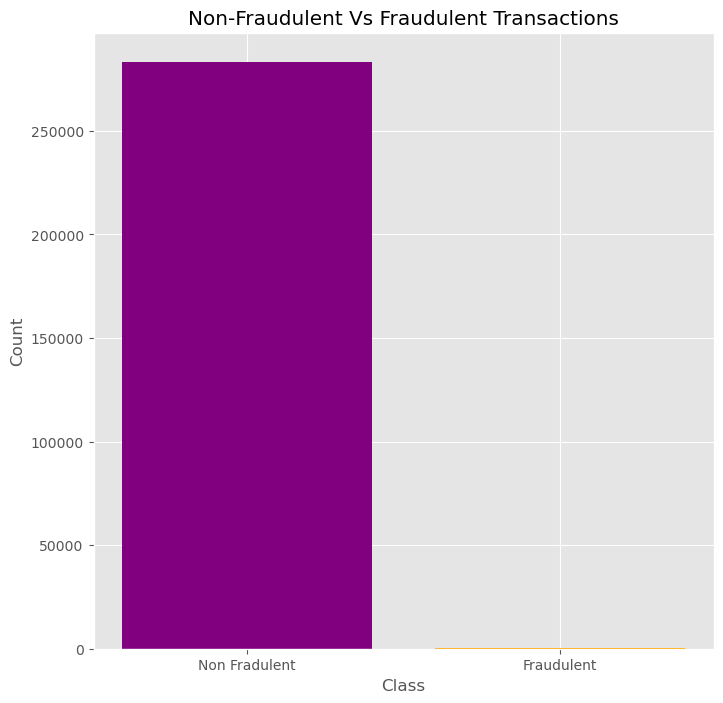

In [19]:
labels = ['Non Fradulent','Fraudulent']
plt.bar(labels, Class.values, color=['Purple','Orange'])
plt.title("Non-Fraudulent Vs Fraudulent Transactions")
plt.xlabel('Class')
plt.ylabel('Count')   

#save the above graph as PNG file
plt.savefig("Non-Fraudulent_Vs_Fraudulent_Transactions.png")
plt.show()

#### The barplot reveals a sharp contrast between classes (0-Non Fradulent) and (1-Fraudulent).
#### Since, most of the features are in PCA form except Time and Amount. We will focus on it for more depth analysis.

In [21]:
# summary of Time column
df['Time'].describe()

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

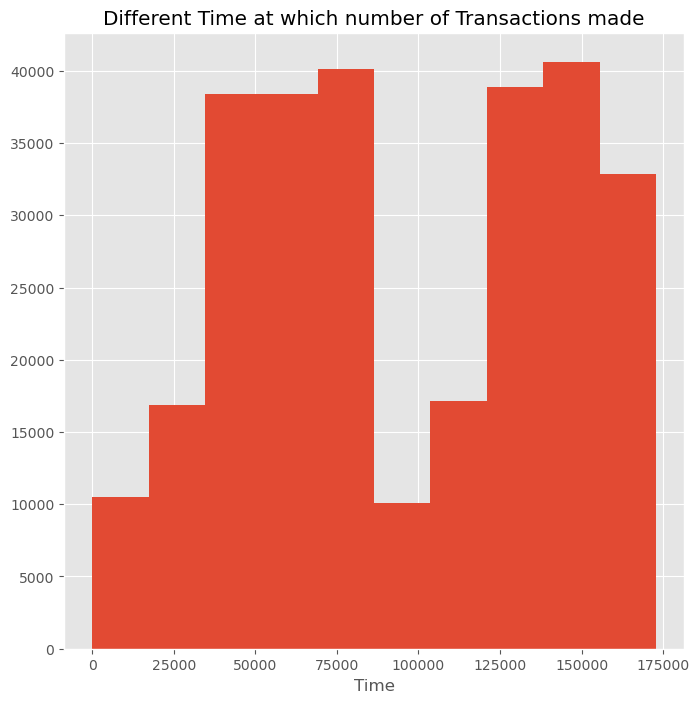

In [22]:
plt.hist(df['Time'])
plt.title("Different Time at which number of Transactions made")
plt.xlabel('Time')
plt.savefig("Different_Time_at_which_number_of_Transactions_made.png")
plt.show()

In [23]:
# summary of Amount column
df['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

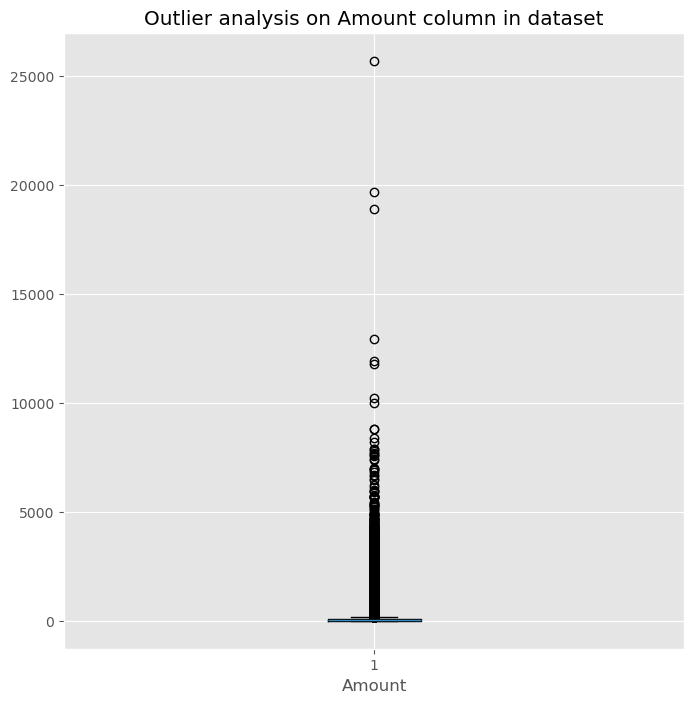

In [24]:
plt.boxplot(df['Amount'])
plt.title("Outlier analysis on Amount column in dataset")
plt.xlabel('Amount')
plt.savefig("Outlier_analysis_on_Amount_column_in_dataset.png")
plt.show()

#### Now,we will partition the dataset into fraudulent and non-fradulent transactions to gain a more detailed perspective.

In [26]:
non_fraud = len(df[df.Class==0])
print("Number of Non-Fraudulent Transactions: ",non_fraud)
fraud = len(df[df.Class==1])
print("Number of Fraudulent Transactions: ", fraud)
fraud_percentage = round((fraud*100)/(fraud+ non_fraud), 2)
print("Percentage of Fraudulent Transactions: ",fraud_percentage)

Number of Non-Fraudulent Transactions:  283253
Number of Fraudulent Transactions:  473
Percentage of Fraudulent Transactions:  0.17


#### The genuine transactions are over 99%.
#### We will apply scaling techniques on the "Amount" feature to transform the range of value and drop the original "Amount" column and add a new column with the scaled values.
#### We will also drop the "Time" columns as it is irrelevant.

In [28]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# dropping Amount and Time column 
df.drop(columns=['Amount','Time'], inplace=True ,axis=1)

# copying class column into Y and rest of the column in X
Y = df['Class']
X = df.drop(['Class'], axis=1)

#left data in creditcard.csv file
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350252
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254325
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.082239
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313391


In [29]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [30]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391


#### Now, we will split the credit card data with a split of 70-30 using train_test_split().
#### train_test_split() function in scikit-learn is a useful utility for splitting a dataset into training and testing sets.

#### Parameters
- #### X: Feature matrix
- #### Y: Target variable

- #### test_size: Represents the fraction of the dataset to be used for testing. In this case, we've set test_size to 0.3, meaning 30% of the data is allocated for the test set.
- #### random_state: We have specified a seed for the random number generator to ensure the results can be reproduced consistently.

In [34]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X,Y, test_size=0.3, random_state=42)

print("Shape of the training dataset train_X: ", train_X.shape)
print("Shape of the testing dataset test_X: ", test_X.shape)

Shape of the training dataset train_X:  (198608, 29)
Shape of the testing dataset test_X:  (85118, 29)


# Applying Machine Learning Algorithm to Credit Card Dataset


#### We will evaluate multiple machine learning algorithms to identify the best model for our binary classification task.

#### The objective is to predict one of two class labels. We intend to assess the performance of algorithms like Random Forest and Decision Tree to determine the most appropriate solution for our problem.

#### Our strategy involves building Random Forest and Decision Tree classifiers to pinpoint the most effective model for this task.

## Decision Tree Algorithm

- #### A Decision Tree is a supervised learning algorithm that splits the dataset into subsets based on feature values, creating a tree-like structure of decisions.

- #### Each internal node represents a feature, each branch represents a decision rule, and each leaf node represents a class label (in classification) or a continuous value (in regression).

- #### The tree is built by recursively splitting the data at each node based on a feature that results in the most significant information gain (for classification) or variance reduction (for regression).

- #### The splitting criterion (e.g., Gini impurity, entropy, or variance) helps determine the best feature to split on at each node.

## Random Forest Algorithm

- #### Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and prevent overfitting.

- #### It operates by constructing multiple decision trees during training and outputs the majority vote (classification) or average prediction (regression) of the individual trees.

- #### Bootstrapping: Each tree is trained on a random subset of the original dataset (with replacement), known as bootstrapping.

- #### Random Feature Selection: At each split in the decision tree, a random subset of features is considered for the best split, helping to reduce correlation between trees.

- #### The final prediction is made by aggregating the predictions from all trees (e.g., voting for classification, averaging for regression).

# Training and Evaluation of models on the dataset

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)

#### In this case, we are initializing a RandomForestClassifier with 100 trees in the ensemble. While a higher number of trees typically improves the model's performance, it may also result in longer training times..

In [52]:
# Decision Tree Classifier
decision_tree.fit(train_X, train_Y)
predictions_data = decision_tree.predict(test_X)

decision_tree_score = decision_tree.score(test_X, test_Y) * 100

# Printing the score of the classifier
print("Decision Tree Score is: ", decision_tree_score)

Decision Tree Score is:  99.91541154632392


In [53]:
# Random Forest
random_forest.fit(train_X, train_Y)
predictions_data_rf = random_forest.predict(test_X)

In [54]:
random_forest_score = random_forest.score(test_X, test_Y) * 100

# Printing the score of the Random Forest Classifiers
print("Random Forest Score is: ", random_forest_score)

Random Forest Score is:  99.9530064146244


In [81]:
# Printing the scores of the both classifiers
print("Decision Tree: ", round((decision_tree_score),2))
print("Random Forest: ", round((random_forest_score),2))

Decision Tree:  99.92
Random Forest:  99.95


#### Random Forest performed better than the Decision Tree.

# Evaluation Metrics

#### We are evaluating our models on following points:

1. #### Accuracy Score

2. #### Precision Score

3. #### Confusion matrix

4. #### Recall Score

5. #### F-1 Score

In [105]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

- ## Decision Tree

In [147]:
print("Evaluation of Decision Tree Model: ")

print("Accuracy:",round(accuracy_score(test_Y,predictions_data),4))
print("Precision:",round(precision_score(test_Y,predictions_data),4))
print("recall_score:",round(recall_score(test_Y,predictions_data),4))
print("F1-Score:",round(f1_score(test_Y,predictions_data),4))

Evaluation of Decision Tree Model: 
Accuracy: 0.9992
Precision: 0.7039
recall_score: 0.7985
F1-Score: 0.7483


In [133]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_data.round())
printconfusion_matrix_dt

array([[84939,    45],
       [   27,   107]], dtype=int64)

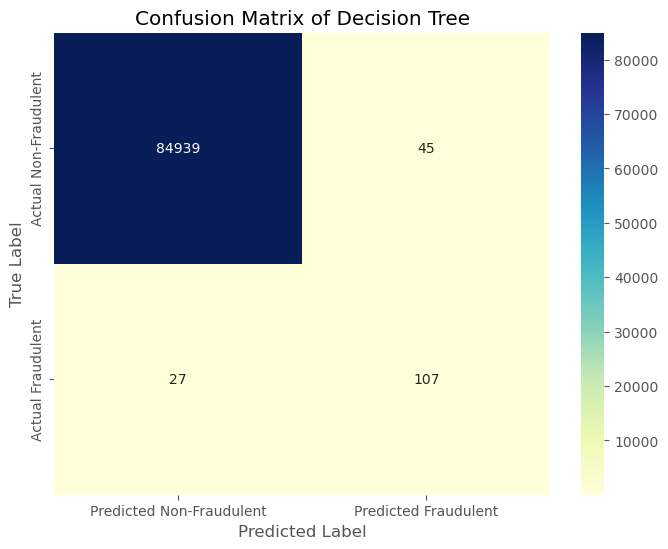

In [139]:
# we will plot the confusion matrix
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_dt, annot=True , fmt='d' , cmap="YlGnBu",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix of Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Confusion_Matrix_of_Decision_Tree.png")
plt.show()

# 0 - non fraudulent
# 1 - fradulent

#### From the confusion matrix heatmap of Decision Tree we get to know:
1. #### The model correctly identified 107 fraudulent transactions.
2. #### The model incorrectly identified 27 transactions as non-fraudulent.
3. #### The model correctly identified 84939 non-fraudulent transactions.
4. #### The model incorrectly identified 45 non-fraudulent transactions as fraudulent.

- ## Random Forest

In [126]:
print("Evaluation of Random Forest Model: ")

print("Accuracy:",round(accuracy_score(test_Y,predictions_data_rf),4))
print("Precision:",round(precision_score(test_Y,predictions_data_rf),4))
print("recall_score:",round(recall_score(test_Y,predictions_data_rf),4))
print("F1-Score:",round(f1_score(test_Y,predictions_data_rf),4))

Evaluation of Random Forest Model: 
Accuracy: 0.9995
Precision: 0.9519
recall_score: 0.7388
F1-Score: 0.8319


In [149]:
confusion_matrix_rf = confusion_matrix(test_Y,predictions_data_rf.round())
confusion_matrix_rf

array([[84979,     5],
       [   35,    99]], dtype=int64)

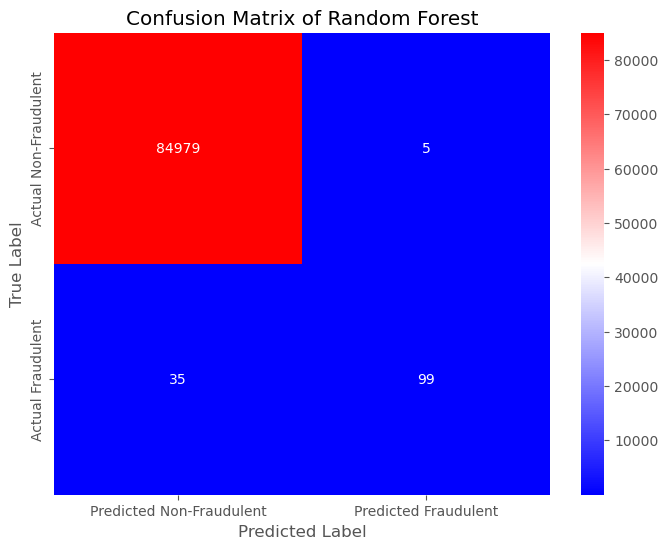

In [155]:
# we will plot the consfusion matrix
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_rf, annot=True , fmt='d' , cmap="bwr",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix of Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Confusion_Matrix_of_Random_Forest.png")
plt.show()

# 0 - non fraudulent
# 1 - fradulent

#### From the confusion matrix heatmap of Decision Tree we get to know:
1. #### The model correctly identified 99 fraudulent transactions.
2. #### The model incorrectly identified 35 transactions as non-fraudulent.
3. #### The model correctly identified 84979 non-fraudulent transactions.
4. #### The model incorrectly identified 5 non-fraudulent transactions as fraudulent.

# Class Imbalance

#### The Random Forest model typically outperforms Decision Trees, especially when dealing with a class imbalance, as seen in this case where genuine transactions represent over 99% of the dataset, while fraudulent transactions make up only 0.17%.

#### Training without addressing this imbalance can lead to skewed predictions.

#### Though the model may appear accurate, it might not effectively detect the minority class (fraud transactions) and may struggle to perform well in real-world scenarios.

#### There are several methods to address class imbalance, one of which is oversampling.

In [160]:
# we will use the SMOT (Synthetic Minority Oversampling Technique, or SMOTE)
# It is the method of data augumentation for the minority class.

from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X,Y)

print("Resampled shape of X: ",X_resampled.shape)
print("Resampled shape of Y: ",Y_resampled.shape)

Resampled shape of X:  (566506, 29)
Resampled shape of Y:  (566506,)


In [162]:
from collections import Counter
value_counts = Counter(Y_resampled)
print(value_counts)

Counter({0: 283253, 1: 283253})


In [164]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [166]:
rf_resampled = RandomForestClassifier(n_estimators=100)
rf_resampled.fit(train_X, train_Y)

RandomForestClassifier()

#### Since, we found out that Random forest is better than Decision Tree we would apply it to the resampled data.

In [169]:
predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100
print(random_forest_score_resampled)

99.98528996422519


## Evaluation Matrics of Resampled data

In [186]:
print("Evaluation of Random Forest Model for resampled data: ")

print("Accuracy:",round(accuracy_score(test_Y,predictions_resampled ),6))
print("Precision:",round(precision_score(test_Y,predictions_resampled ),6))
print("recall_score:",round(recall_score(test_Y,predictions_resampled ),6))
print("F1-Score:",round(f1_score(test_Y,predictions_resampled ),6))

Evaluation of Random Forest Model for resampled data: 
Accuracy: 0.999853
Precision: 0.999706
recall_score: 1.0
F1-Score: 0.999853


#### Our model has demonstrated significantly improved performance compared to the previous Random Forest classifier that did not use oversampling. By applying techniques to handle class imbalance, we achieved an accuracy exceeding 99%.

In [188]:
confusion_matrix_rf_resampled= confusion_matrix(test_Y,predictions_resampled.round())
confusion_matrix_rf_resampled

array([[84855,    25],
       [    0, 85072]], dtype=int64)

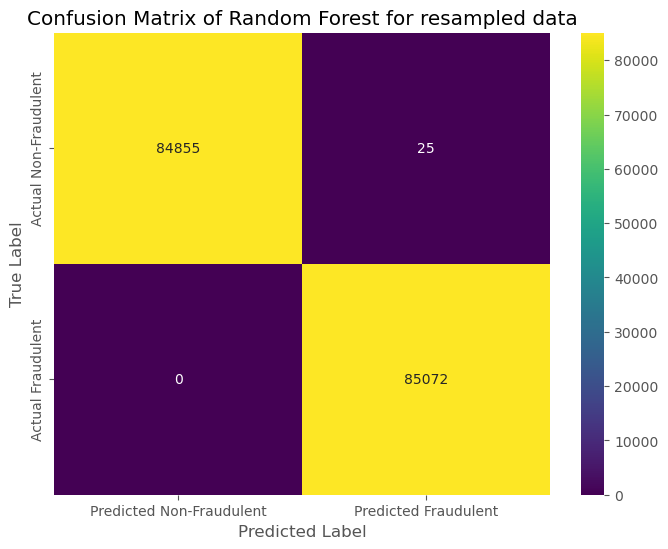

In [200]:
# Confusion Matrix
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_rf_resampled, annot=True , fmt='d' , cmap="viridis",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix of Random Forest for resampled data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Confusion_Matrix_of_Random_Forest_for_resampled_data.png")
plt.show()

#### From the confusion matrix heatmap of Decision Tree we get to know:
1. #### The model correctly identified 85072 fraudulent transactions.
2. #### The model incorrectly identified 0 transactions as non-fraudulent.
3. #### The model correctly identified 84885 non-fraudulent transactions.
4. #### The model incorrectly identified 25 non-fraudulent transactions as fraudulent.

#### To prepare for model deployment as part of future plans, we will use the pickle library to save both the dataframe and the model.

In [198]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(rf_resampled,open('rf_resampled.pkl','wb'))